# MLP Neural Network

1. Import the relevant packages and dataset, and visualize the input dataset

In [3]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. Let's plot a few images to see what they will look like in the code here

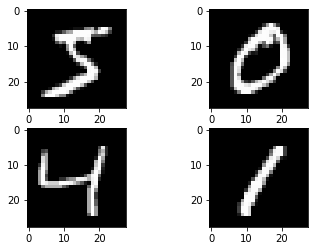

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.show()

2. Flatten the 28 x 28 images so that the input is all the 784 pixel values. Additionally, one-hot encode the outputs. This step is key in the dataset preparation process:

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_test.shape

(10000, 784)

3. In Keras, the one-hot encoding approach on top of labels is performed using the to_categorical method, which figures out the number of unique labels in the target data, and then converts them into a one-hot encoded vector.

In [65]:
print(y_test[1:30])

[2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [66]:
#enc = OneHotEncoder(categories='auto', sparse=False)
#y_test = enc.fit_transform(y_test.reshape([-1, 1]))

In [67]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

4. The input has 784 values that are connected to 1,000 values in a hidden layer. Additionally, we are also specifying that the activation, which is to be performed in the hidden layer after the matrix multiplication of the input and the weights connecting the input and hidden layer, is the ReLu activation.

    Finally, the hidden layer is connected to an output that has 10 values (as there are 10 columns in the vector created by the to_categorical method), and we perform softmax on top of the output so that we obtain the probability of an image belonging to a certain class.

In [68]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))

5. The model architecture can be visualized as follows:

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


The number of parameters in the first layer is 785,000, as the 784 input units are connected to 1,000 hidden units, resulting in 784 * 1,000 weight values, and 1,000 bias values, for the 1,000 hidden units, resulting in a total of 785,000 parameters.

Similarly, the output layer has 10 outputs, which are connected to each of the 1,000 hidden layers, resulting in 1,000 * 10 parameters and 10 biases—a total of 10,010 parameters.

The output layer has 10 units as there are 10 possible labels in the output. The output layer now gives us a probability value for each class for a given input image.

6. Compile the model as follows.
Note that because the target variable is a one-hot encoded vector with multiple classes in it, the loss function will be a categorical cross-entropy loss.

    Additionally, we are using the Adam optimizer to minimize the cost function

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

7. Fit the model as follows

In [71]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 18.5036 - accuracy: 0.8393 - val_loss: 2.8778 - val_accuracy: 0.9377
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.8782 - accuracy: 0.9455 - val_loss: 1.4653 - val_accuracy: 0.9482
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.7918 - accuracy: 0.9627 - val_loss: 1.1236 - val_accuracy: 0.9537
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4565 - accuracy: 0.9722 - val_loss: 0.9472 - val_accuracy: 0.9576
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2447 - accuracy: 0.9807 - val_loss: 0.8382 - val_accuracy: 0.9587
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1523 - accuracy: 0.9847 - val_loss: 0.8724 - val_accuracy: 0.9578
Epoch 7/10
60000/60000 [==============================] - 3s 55us/s

8. Extract the training and test loss and accuracy metrics over different epochs.While fitting a model, the history variable will have stored the accuracy and loss values corresponding to the model in each epoch for both the training and the test datasets.

In [73]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

9.Visualize the training and test loss and the accuracy over a different number of epochs

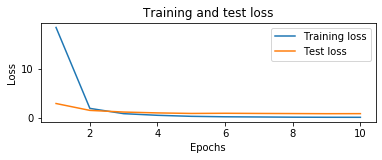

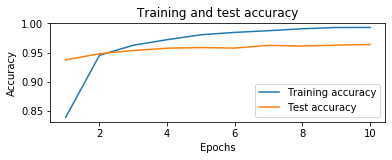

In [77]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'],  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

9. Calculate the accuracy of the model manually

In [42]:
preds = model.predict(X_test)

We are looping all of the test predictions one at a time. For each test prediction, we are perming argmax to obtain the index that has the highest probability value.

In [43]:
import numpy as np
correct = 0
for i in range(len(X_test)):
    pred = np.argmax(preds[i],axis=0)
    act = np.argmax(y_test[i],axis=0)
    if(pred==act):
        correct+=1
    else:
        continue

correct/len(X_test)

0.0912

Baseline Error: 3.16%
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


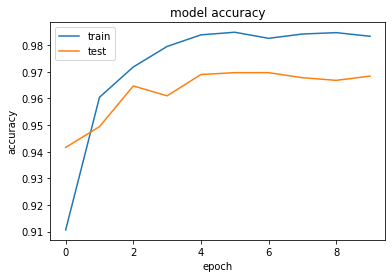

In [47]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
  # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
history =model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=0)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Baseline Error: 3.21%
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


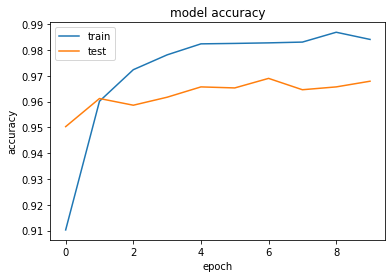

In [80]:
# Baseline MLP for MNIST dataset
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255

#### pandas one hot encoding
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

###sklearn-one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto', sparse=False)
y_train= enc.fit_transform(y_train.reshape([-1, 1]))
y_test= enc.fit_transform(y_test.reshape([-1, 1]))

#### np_utils one hot encoding#######
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
  # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
history =model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=0)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Building a neural network with scaling

In [ ]:
# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Commenting this out coz this is already reshaped

We have scaled the training and test inputs to a value between zero and one by dividing each value by the maximum possible value in the dataset, which is 255.

In [81]:
X_train = X_train/255
X_test = X_test/255

In [82]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]

# Redundant as already done in the first part

In [83]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.4771 - accuracy: 0.8713 - val_loss: 0.2280 - val_accuracy: 0.9353
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1962 - accuracy: 0.9450 - val_loss: 0.1653 - val_accuracy: 0.9525
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1425 - accuracy: 0.9602 - val_loss: 0.1271 - val_accuracy: 0.9637
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1083 - accuracy: 0.9699 - val_loss: 0.1083 - val_accuracy: 0.9697
Epoch 5/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0867 - accuracy: 0.9753 - val_loss: 0.0955 - val_accuracy: 0.9724
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0697 - accuracy: 0.9813 - val_loss: 0.0820 - val_accuracy: 0.9756
Epoch 7/10
60000/60000 [==============================] - 4s 63us/st

In [85]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

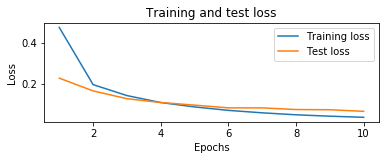

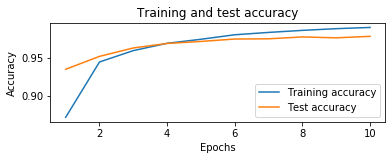

In [86]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'],  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Baseline Error: 1.77%
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


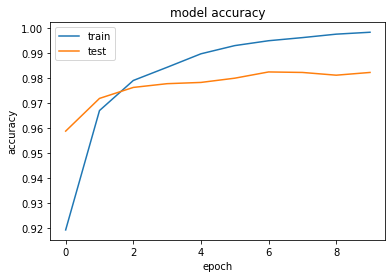

In [48]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
  # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
history =model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=0)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Notice that training and test losses decreased smoothly over increasing epochs when compared to the non-scaled dataset that we saw in the previous section.

Notice that there is a gap between the training and test accuracy/loss values, indicating that there is potential overfitting on top of the training dataset.

# Impact of having high number of non-zero values

In [87]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [88]:
28*28*X_train.shape[0]

47040000

In [89]:
X_train.flatten().shape

(47040000,)

In [90]:
X_train/=255
X_test/=255

Text(0, 0.5, 'Frequency of input values')

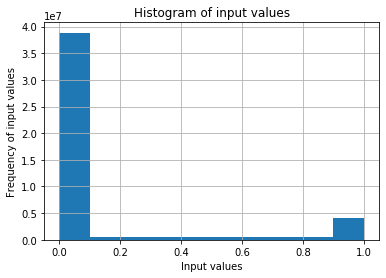

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X_train.flatten())
plt.grid(False)
plt.title('Histogram of input values')
plt.xlabel('Input values')
plt.ylabel('Frequency of input values')

We notice that the majority of the inputs are zero (you should note that all the input images have a background that is black hence, a majority of the values are zero, which is the pixel value of the color black).

We will invert the background color, and also the foreground color. Essentially, the background will be colored white in this scenario, and the label will be written in black.
The intuition for this change impacting the model accuracy is as follows.

The pixels in the corner of images do not contribute toward predicting the label of an image. Given that a black pixel (original scenario) has a pixel value of zero, it is automatically taken care of, as when this input is multiplied by any weight value, the output is zero. This will result in the network learning that any change in the weight value connecting this corner pixel to a hidden layer will not have an impact on changing the loss value.

However, if we have a white pixel in the corner (where we already know that the corner pixels do not contribute toward predicting the label of an image), it will contribute toward certain hidden unit values, and thus the weights need to be fine-tuned until the impact of the corner pixels on the predicted label is minimal.

In [92]:
X_train = 1-X_train
X_test = 1-X_test

In [93]:
X_train.shape

(60000, 784)

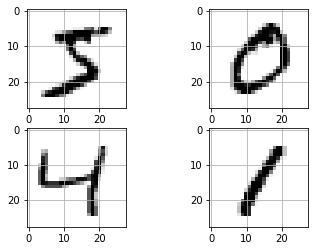

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.subplot(224)
plt.imshow(X_train[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.show()

Text(0, 0.5, 'Frequency of input values')

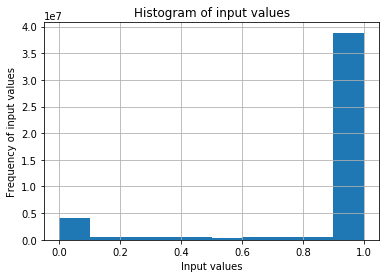

In [95]:
plt.hist(X_train.flatten())
plt.grid(False)
plt.title('Histogram of input values')
plt.xlabel('Input values')
plt.ylabel('Frequency of input values')

In [96]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.4753 - accuracy: 0.8550 - val_loss: 0.2905 - val_accuracy: 0.9147
Epoch 2/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.2723 - accuracy: 0.9172 - val_loss: 0.2115 - val_accuracy: 0.9340
Epoch 3/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.2089 - accuracy: 0.9364 - val_loss: 0.1768 - val_accuracy: 0.9473
Epoch 4/10
60000/60000 [==============================] - 27s 442us/step - loss: 0.1750 - accuracy: 0.9462 - val_loss: 0.1539 - val_accuracy: 0.9544
Epoch 5/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.1528 - accuracy: 0.9537 - val_loss: 0.1416 - val_accuracy: 0.9577
Epoch 6/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.1404 - accuracy: 0.9570 - val_loss: 0.1217 - val_accuracy: 0.9652
Epoch 7/10
60000/60000 [==============================] 

In [97]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

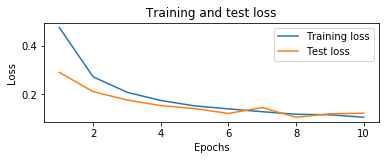

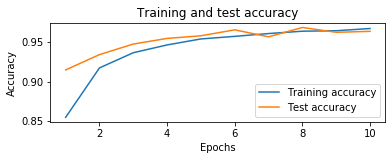

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, val_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We should note that model accuracy has now fallen to ~97%, compared to ~98% when using the same model for the same number of epochs and batch size, but on a dataset that has a majority of zeros (and not a majority of ones). Additionally, the model achieved an accuracy of 97%, considerably more slowly than in the scenario where the majority of the input pixels are zero.

# Impact of high batch size on network learning

To understand the reason batch size has an impact on model accuracy, let's contrast two scenarios where the total dataset size is 60,000:

- Batch size is 30,000
- Batch size is 32

When the batch size is large, the number of times of weight update per epoch is small, when compared to the scenario when the batch size is small.

The reason for a high number of weight updates per epoch when the batch size is small is that less data points are considered to calculate the loss value. This results in more batches per epoch, as, loosely, in an epoch, you would have to go through all the training data points in a dataset.

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=30000, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 71us/step - loss: 2.1926 - accuracy: 0.2403 - val_loss: 1.7040 - val_accuracy: 0.6599
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 1.5658 - accuracy: 0.7000 - val_loss: 1.1526 - val_accuracy: 0.8029
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 1.0822 - accuracy: 0.8025 - val_loss: 0.8134 - val_accuracy: 0.8366
Epoch 4/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.7864 - accuracy: 0.8285 - val_loss: 0.6183 - val_accuracy: 0.8514
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.6142 - accuracy: 0.8436 - val_loss: 0.5082 - val_accuracy: 0.8649
Epoch 6/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.5122 - accuracy: 0.8589 - val_loss: 0.4397 - val_accuracy: 0.8820
Epoch 7/50
60000/60000 [==============================] - 4s 60us/st

In [104]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

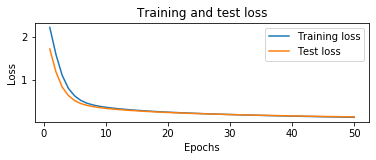

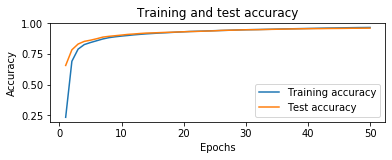

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, val_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

You should notice that the model accuracy reached ~98% at a much later epoch, when compared to the model accuracy it reached when the batch size was smaller. The reason for a low accuracy during initial epochs is that the number of times of weight update is much lower in this scenario when compared to the previous scenario (where the batch size was smaller).

You should be careful not to have too few examples in the batch size, which might result in not only having a very long training time, but also a potential overfitting scenario.

# Building a deep neural network

We have looked at model architectures where the neural network has only one hidden layer between the input and the output layers. In this section, we will look at the neural network where there are multiple hidden layers (and hence a deep neural network), while reusing the same MNIST training and test dataset that were scaled.

In [106]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.3775 - accuracy: 0.8861 - val_loss: 0.1314 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.1009 - accuracy: 0.9700 - val_loss: 0.0900 - val_accuracy: 0.9707
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0738 - val_accuracy: 0.9763
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 5/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 6/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0703 - val_accuracy: 0.9817
Epoch 7/10
60000/60000 [==============================] 

In [107]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

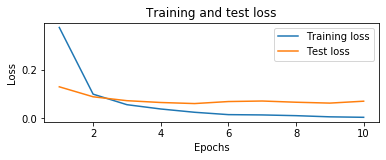

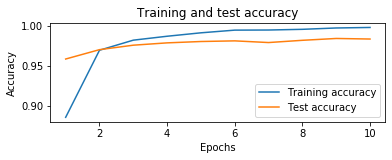

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, val_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Notice that there is a considerable gap between training and test loss, indicating that the deep feedforward neural network specialized on training data.

# Impact of varying learning rate on network accuracy

The learning rate is used in updating weights and the change in weight is proportional to the amount of loss reduction.

Additionally, a change in a weight's value is equal to the decrease in loss multiplied by the learning rate. Hence, the lower the learning rate, the lower the change in the weight value, and vice versa.

So far, in the previous recipes, we used the default learning rate of the Adam optimizer, which is 0.0001. In this section, we will manually set the learning rate to a higher number and see the impact of changing the learning rate on model accuracy, while reusing the same MNIST training and test dataset that were scaled in the previous recipes.

In [109]:
from keras.optimizers import Adam
adam = Adam(lr = 0.01)

In [110]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.4579 - accuracy: 0.8697 - val_loss: 0.1291 - val_accuracy: 0.9593
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0997 - accuracy: 0.9701 - val_loss: 0.0907 - val_accuracy: 0.9714
Epoch 3/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0760 - val_accuracy: 0.9758
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0794 - val_accuracy: 0.9749
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0701 - val_accuracy: 0.9777
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0721 - val_accuracy: 0.9790
Epoch 7/10
60000/60000 [==============================] - 4s 58us/st

In [111]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

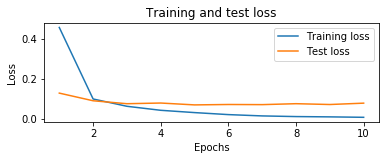

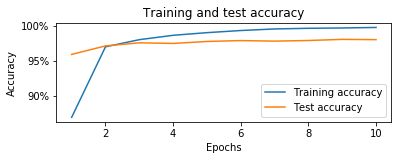

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, val_loss_values, label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.show()

Note that when the learning rate was high (0.01 in the current scenario) compared to 0.0001 (in the scenario considered in the Scaling input dataset case), the loss decreased less smoothly when compared to the low-learning-rate model.

The low-learning-rate model updates the weights slowly, thereby resulting in a smoothly reducing loss function, as well as a high accuracy, which was achieved slowly over a higher number of epochs.

It is, in general, a good idea to set the learning rate to a low value and let the network learn over a high number of epochs.

# Impact of varying optimizers on network accuracy

So far, in the previous recipes, we considered the loss optimizer to be the Adam optimizer. However, there are multiple other variants of optimizers, and a change in the optimizer is likely to impact the speed with which the model learns to fit the input and the output.

In [114]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

To understand the impact of varying the optimizer on network accuracy, let's contrast the scenario laid out in previous sections (which was the Adam optimizer) with using a stochastic gradient descent optimizer in this section, while reusing the same MNIST training and test datasets that were scaled

In [115]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.5920 - accuracy: 0.8587 - val_loss: 0.3318 - val_accuracy: 0.9130
Epoch 2/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.3155 - accuracy: 0.9125 - val_loss: 0.2716 - val_accuracy: 0.9251
Epoch 3/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.2686 - accuracy: 0.9258 - val_loss: 0.2427 - val_accuracy: 0.9317
Epoch 4/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2388 - accuracy: 0.9341 - val_loss: 0.2177 - val_accuracy: 0.9391
Epoch 5/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.2161 - accuracy: 0.9402 - val_loss: 0.2024 - val_accuracy: 0.9434
Epoch 6/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1974 - accuracy: 0.9455 - val_loss: 0.1871 - val_accuracy: 0.9468
Epoch 7/10
60000/60000 [==============================] 

In [116]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

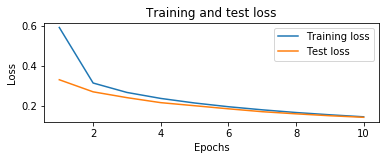

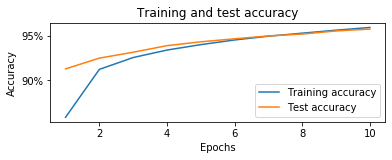

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, val_loss_values,label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.show()

When we used the stochastic gradient descent optimizer above, the final accuracy after 10 epochs is ~95%. We should also note that the model achieved the high accuracy levels much more slowly when compared to the model that used Adam optimization.

# Understanding overfitting

In some of the cases above, we have noticed that the training accuracy is ~100%, while test accuracy is ~98%, which is a case of overfitting on top of a training dataset. 

To gain an intuition of the difference between the training and the test accuracies and to understand the phenomenon resulting in overfitting, let's contrast two scenarios where we compare the training and test accuracies along with a histogram of the weights:

- Model is run for five epochs
- Model is run for 20 epochs

In [118]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4814 - accuracy: 0.8693 - val_loss: 0.2281 - val_accuracy: 0.9329
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.1982 - accuracy: 0.9438 - val_loss: 0.1652 - val_accuracy: 0.9524
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.1431 - accuracy: 0.9602 - val_loss: 0.1327 - val_accuracy: 0.9626
Epoch 4/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1095 - accuracy: 0.9696 - val_loss: 0.1072 - val_accuracy: 0.9705
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0866 - accuracy: 0.9764 - val_loss: 0.0943 - val_accuracy: 0.9727


In [119]:
model.weights

[<tf.Variable 'dense_33/kernel:0' shape=(784, 1000) dtype=float32, numpy=
 array([[ 0.03298215, -0.00844706,  0.03702267, ..., -0.04177391,
          0.03584325, -0.04530009],
        [-0.04795167,  0.01499925,  0.02576118, ..., -0.00854138,
         -0.05372606,  0.0052348 ],
        [ 0.01526398, -0.01227488, -0.00176319, ...,  0.00928093,
          0.00150575,  0.03932474],
        ...,
        [-0.0060682 , -0.04203924,  0.03346897, ...,  0.02197601,
          0.04937952, -0.01087161],
        [ 0.00851796, -0.04391894, -0.00233813, ...,  0.01684373,
          0.00561127, -0.00586624],
        [ 0.01812688,  0.00062154,  0.02114534, ..., -0.00726443,
         -0.0180827 , -0.00404102]], dtype=float32)>,
 <tf.Variable 'dense_33/bias:0' shape=(1000,) dtype=float32, numpy=
 array([ 3.96383461e-03, -7.11028511e-03, -7.57556548e-03,  1.64223218e-03,
         3.94703681e-03,  1.07185971e-02,  1.07521890e-02,  2.81292293e-02,
         2.14544293e-02, -1.45331686e-02,  9.40860156e-03,  1.2

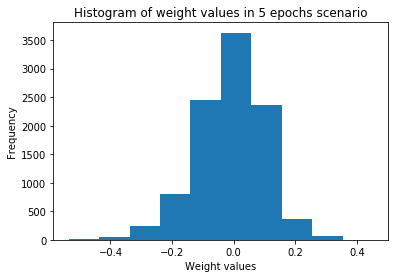

In [124]:
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values in 5 epochs scenario')
plt.grid(False)

In [121]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.4686 - accuracy: 0.8742 - val_loss: 0.2260 - val_accuracy: 0.9365
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1927 - accuracy: 0.9459 - val_loss: 0.1587 - val_accuracy: 0.9531
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1366 - accuracy: 0.9616 - val_loss: 0.1262 - val_accuracy: 0.9630
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1057 - accuracy: 0.9707 - val_loss: 0.1064 - val_accuracy: 0.9682
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0835 - accuracy: 0.9772 - val_loss: 0.0919 - val_accuracy: 0.9723
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0667 - accuracy: 0.9820 - val_loss: 0.0840 - val_accuracy: 0.9727
Epoch 7/20
60000/60000 [==============================] - 4s 61us/st

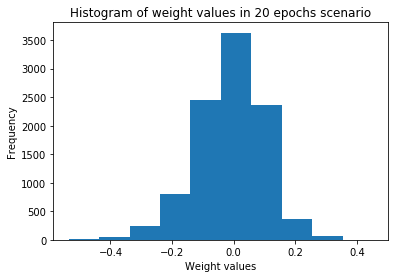

In [126]:
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values in 20 epochs scenario')
plt.grid(False)

Once we plot the histogram of weights that are connecting the hidden layer to the output layer, we will notice that the 100-epochs scenario has a higher spread of weights when compared to the five-epochs scenario. You should note that the 100 epochs scenario had a higher dispersion of weight values when compared to the five-epochs scenario. This is because of the higher amount of opportunity that the model had to overfit on top of the training dataset when the model is run for 100-epochs, when compared to when the model is run for five epochs, as the number of weight updates in the 100-epochs scenario is higher than the number of weight updates in the five-epochs scenario.

A high value of weight (along with a difference in the training and test dataset) is a good indication of a potential over-fitting of the model and/or a potential opportunity to scale input/weights to increase the accuracy of the model.

# Adding L2 regularization to reduce overfitting

Recall that a high weight magnitude is one of the reasons for over-fitting. In this section, we will look into ways to get around the problem of over-fitting, such as penalizing for high weight magnitude values.

In [127]:
from keras.regularizers import l2

Below, we are providing an additional hyperparameter—kernel_regularizer to the model and also specifying whether it is an L1/L2 regularization. Furthermore, we also specify the lambda value that gives the weight to regularization.

In [128]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(10,  activation='softmax',kernel_regularizer=l2(0.01)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 3.9421 - accuracy: 0.8459 - val_loss: 1.0500 - val_accuracy: 0.9058
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.8329 - accuracy: 0.9039 - val_loss: 0.7231 - val_accuracy: 0.9133
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.7308 - accuracy: 0.9079 - val_loss: 0.7048 - val_accuracy: 0.9147
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.7189 - accuracy: 0.9087 - val_loss: 0.6951 - val_accuracy: 0.9139
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.7139 - accuracy: 0.9100 - val_loss: 0.6921 - val_accuracy: 0.9182
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.7120 - accuracy: 0.9098 - val_loss: 0.6901 - val_accuracy: 0.9158
Epoch 7/10
60000/60000 [==============================] - 4s 70us/st

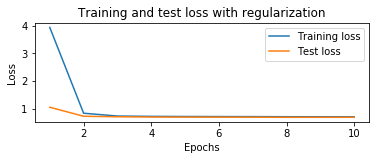

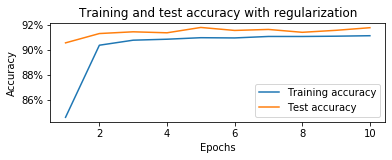

In [129]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, val_loss_values, label='Test loss')
plt.title('Training and test loss with regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy with regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(False)
plt.show()

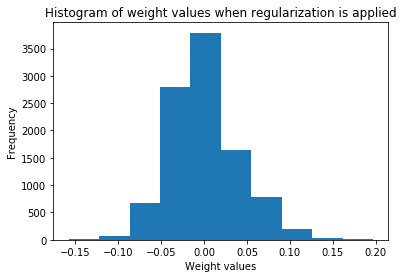

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when regularization is applied')
plt.grid(False)

We notice that, after regularization, the training dataset accuracy does not happen to be at ~100%, while the test data accuracy is at 91%.

We also notice that the majority of weights are now much closer to zero when compared to the previous scenario, thus presenting a case to avoid the overfitting issue.

# Applying dropout to reduce overfitting

In the previous section of overcoming overfitting using regularization, we used L1/ L2 regularization as a means to avoid overfitting. In this section, we will use another tool that is helpful to achieve the same—dropout.

Dropout can be considered a way in which only a certain percentage of weights get updated, while the others do not get updated in a given iteration of weight updates. This way, we are in a position where not all weights get updated in a weight update process, thus avoiding certain weights to achieve a very high magnitude when compared to others.


In [149]:
model_nodrop = Sequential()
model_nodrop.add(Dense(1000, input_dim=784, activation='relu'))
model_nodrop.add(Dense(10,  activation='softmax'))
model_nodrop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_nodrop = model_nodrop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=10000, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 1.5249 - accuracy: 0.6330 - val_loss: 0.7584 - val_accuracy: 0.8464
Epoch 2/30
60000/60000 [==============================] - 2s 32us/step - loss: 0.5990 - accuracy: 0.8537 - val_loss: 0.4278 - val_accuracy: 0.8811
Epoch 3/30
60000/60000 [==============================] - 2s 33us/step - loss: 0.4007 - accuracy: 0.8861 - val_loss: 0.3443 - val_accuracy: 0.9015
Epoch 4/30
60000/60000 [==============================] - 2s 33us/step - loss: 0.3353 - accuracy: 0.9025 - val_loss: 0.3043 - val_accuracy: 0.9134
Epoch 5/30
60000/60000 [==============================] - 2s 33us/step - loss: 0.2963 - accuracy: 0.9147 - val_loss: 0.2738 - val_accuracy: 0.9210
Epoch 6/30
60000/60000 [==============================] - 2s 33us/step - loss: 0.2679 - accuracy: 0.9232 - val_loss: 0.2506 - val_accuracy: 0.9273
Epoch 7/30
60000/60000 [==============================] - 2s 33us/st

In [ ]:
from keras.layers import Dropout, Activation


Below, we are giving a dropout of 0.75; that is, randomly, 75% of weights do not get updated in a certain weight update iteration.

In [147]:
model_drop = Sequential()
model_drop.add(Dense(1000, input_dim=784, activation='relu'))
model_drop.add(Dropout(0.75))
model_drop.add(Dense(10,  activation='softmax'))
model_drop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_drop = model_drop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=10000, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 53us/step - loss: 1.7258 - accuracy: 0.4502 - val_loss: 0.8541 - val_accuracy: 0.8333
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.7907 - accuracy: 0.7745 - val_loss: 0.4638 - val_accuracy: 0.8750
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.5399 - accuracy: 0.8349 - val_loss: 0.3623 - val_accuracy: 0.8978
Epoch 4/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.4423 - accuracy: 0.8661 - val_loss: 0.3176 - val_accuracy: 0.9099
Epoch 5/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.3830 - accuracy: 0.8843 - val_loss: 0.2855 - val_accuracy: 0.9198
Epoch 6/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.3419 - accuracy: 0.8992 - val_loss: 0.2635 - val_accuracy: 0.9251
Epoch 7/30
60000/60000 [==============================] - 2s 41us/st

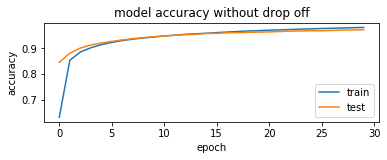

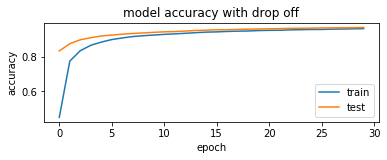

In [151]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(history_nodrop.history['accuracy'])
plt.plot(history_nodrop.history['val_accuracy'])
plt.title('model accuracy without drop off')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.subplot(212)
plt.plot(history_drop.history['accuracy'])
plt.plot(history_drop.history['val_accuracy'])
plt.title('model accuracy with drop off')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Adding batch normalization

We learned that optimization is slow when the input data is not scaled (that is, it is not between zero and one). 

The hidden layer value could be high in the following scenarios:

- Input data values are high
- Weight values are high
- The multiplication of weight and input are high
Any of these scenarios can result in a large output value on the hidden layer.

Note that the hidden layer is the input layer to output layer. Hence, the phenomenon of high input values resulting in a slow optimization holds true when hidden layer values are large as well.

To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.

However, after this shift/scale of activation outputs by some randomly initialized parameters, the weights in the next layer are no longer optimal. SGD ( Stochastic gradient descent) undoes this normalization if it’s a way for it to minimize the loss function.

Consequently, batch normalization adds two trainable parameters to each layer, so the normalized output is multiplied by a “standard deviation” parameter (gamma) and add a “mean” parameter (beta). In other words, batch normalization lets SGD do the denormalization by changing only these two weights for each activation, instead of losing the stability of the network by changing all the weights.

$$\text{Batch mean: } \mu_B=\frac{1}{m}\sum_{i=1}^{m} x_i$$
$$\text{Batch variance: } \sigma^2_B=\frac{1}{m}\sum_{i=1}^{m} (x_i-\mu_B)^2$$
$$\overline{x}_i=\frac{x_i-\mu_b}{\sqrt{\sigma^2_B+\epsilon}}$$
$$y_i=\gamma \overline{x}_i + \beta $$

In [9]:
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

The only addition to the model is that we perform batch normalization in a hidden layer.

In [10]:
model_nobatch = Sequential()
model_nobatch.add(Dense(1000, input_dim=784,activation='relu', kernel_regularizer = l2(0.01)))
model_nobatch.add(Dense(10,  activation='softmax', kernel_regularizer = l2(0.01)))
from keras.optimizers import Adam
#adam = Adam(lr = 0.01)
model_nobatch.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_nobatch = model_nobatch.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=0)

In [163]:
model_batch = Sequential()
model_batch.add(Dense(1000, input_dim=784,activation='relu', kernel_regularizer = l2(0.01)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(10,  activation='softmax', kernel_regularizer = l2(0.01)))
from keras.optimizers import Adam
#adam = Adam(lr = 0.01)
model_batch.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_batch = model_batch.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=0)

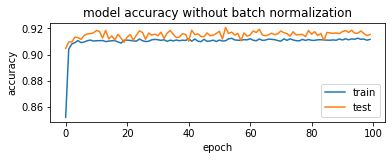

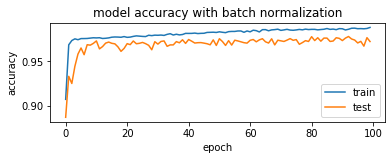

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(history_nobatch.history['accuracy'])
plt.plot(history_nobatch.history['val_accuracy'])
plt.title('model accuracy without batch normalization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.subplot(212)
plt.plot(history_batch.history['accuracy'])
plt.plot(history_batch.history['val_accuracy'])
plt.title('model accuracy with batch normalization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

We see much faster training when we perform batch normalization (test dataset accuracy of ~97%) than compared to when we don't (test dataset accuracy of ~91%).

Thus, batch normalization results in much quicker training.

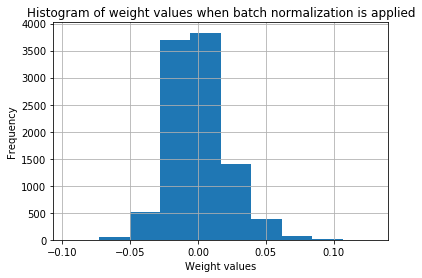

In [139]:
plt.hist(model.get_weights()[-2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when batch normalization is applied')
plt.grid('off')